In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from collections import  Counter
import nltk
import pickle
import string


%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Importing Dataset
df = pd.read_csv("/content/spam.csv", encoding="latin-1")

In [ ]:
df.sample(1)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2189,ham,Yup i shd haf ard 10 pages if i add figures......,NaN,NaN,NaN


In [ ]:
# Dataset with required features only
df = pd.read_csv("/content/spam.csv", encoding="latin-1", usecols=["v1","v2"])

In [ ]:
df.sample(5)

,v1,v2
3782,ham,Can you do online transaction?
3818,ham,"sorry brah, just finished the last of my exams..."
5442,ham,"I thought i'd get him a watch, just cos thats ..."
1156,ham,Hey.. Something came up last min.. Think i wun...
3565,ham,Its ok..come to my home it vl nice to meet and...


In [ ]:
# Rename the Features
df.rename(columns={"v1": "output","v2": "input"}, inplace = True)
df.sample(1)

,output,input
4568,ham,At WHAT TIME should i come tomorrow


In [ ]:
# Encoding Target Feature
le = LabelEncoder()
df["output"] = le.fit_transform(df["output"])
df.sample(1)

,output,input
372,0,I'm going for bath will msg you next &lt;#&gt...


In [ ]:
# Shape of the Dataset
df.shape

(5572, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   output  5572 non-null   int64 
 1   input   5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [ ]:
# Check Null Values
df.isnull().sum()

output    0
input     0
dtype: int64

In [ ]:
# Drop Duplicates
df = df.drop_duplicates(keep="first")

In [ ]:
df.shape

(5169, 2)

In [ ]:
df.head()

,output,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Ham & Spam Counts
df["output"].value_counts()

0    4516
1     653
Name: output, dtype: int64

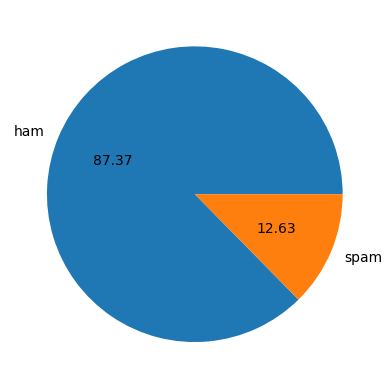

In [ ]:
plt.pie(df["output"].value_counts(),autopct = "%.2f", labels=['ham','spam'])
plt.show()

In [ ]:
# Total No. of Characters in Data
df["characters"] = df["input"].apply(len)

In [ ]:
# Total No. of Words in Data
df["word"] = df["input"].apply(lambda x:len( nltk.word_tokenize(x)))

In [ ]:
# Total No. of Sentence
df["sentence"] = df["input"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head(1)

,output,input,characters,word,sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2


In [ ]:
# Statistical Analysis of new features
df[["characters","word", "sentence"]].describe()

,characters,word,sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# Statistical Analysis for HAM Data
df[df["output"]==0][["characters","word", "sentence"]].describe()

,characters,word,sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# Statistical Analysis for SPAM Data
df[df["output"] ==1][["characters","word", "sentence"]].describe()

,characters,word,sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


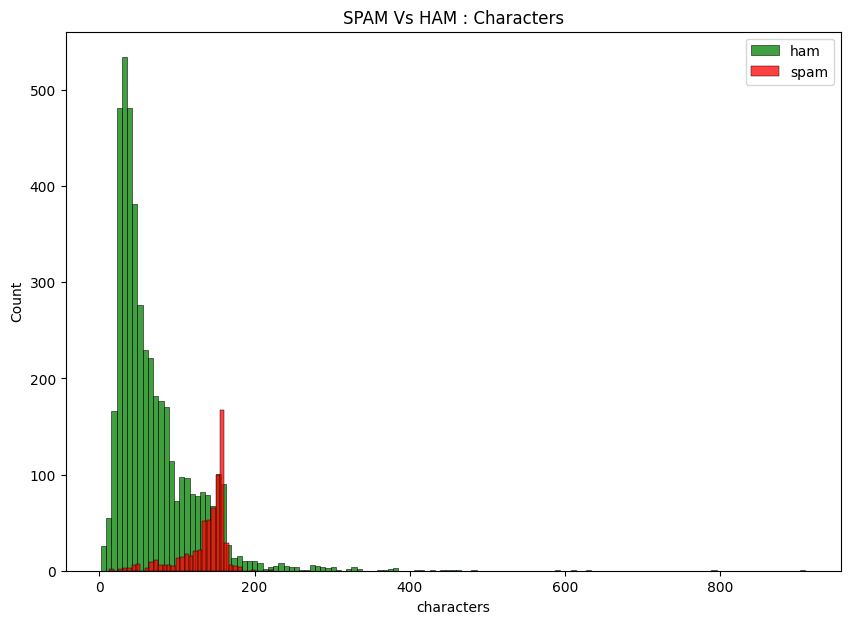

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(df[df["output"]==0]["characters"],label= "ham",color="green")
sns.histplot(df[df["output"]==1]["characters"],label= "spam",color = "red")
plt.title("SPAM Vs HAM : Characters")
plt.legend()
plt.show()

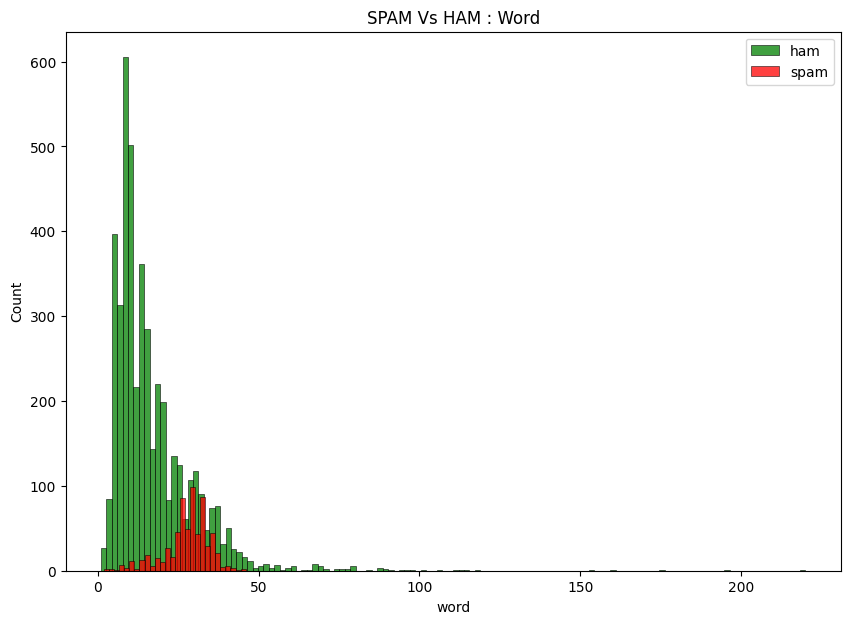

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(df[df["output"]==0]["word"],label= "ham",color="green")
sns.histplot(df[df["output"]==1]["word"],label= "spam",color = "red")
plt.title("SPAM Vs HAM : Word")
plt.legend()
plt.show()

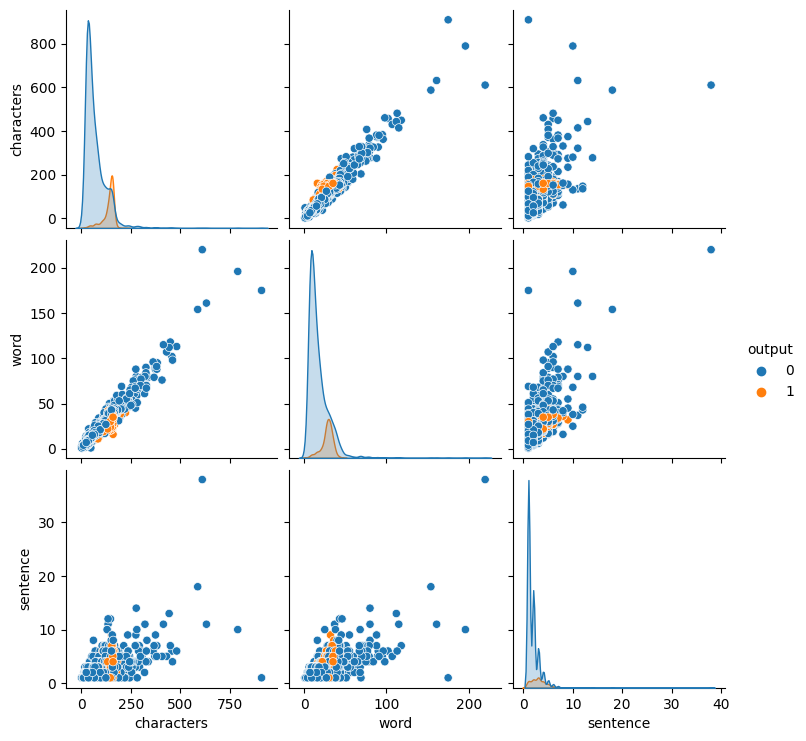

In [ ]:
sns.pairplot(df,hue="output")

In [ ]:
# Correlations between features
df.corr()

,output,characters,word,sentence
output,1.000000,0.384717,0.262912,0.263939
characters,0.384717,1.000000,0.965760,0.624139
word,0.262912,0.965760,1.000000,0.679971
sentence,0.263939,0.624139,0.679971,1.000000


<Axes: >

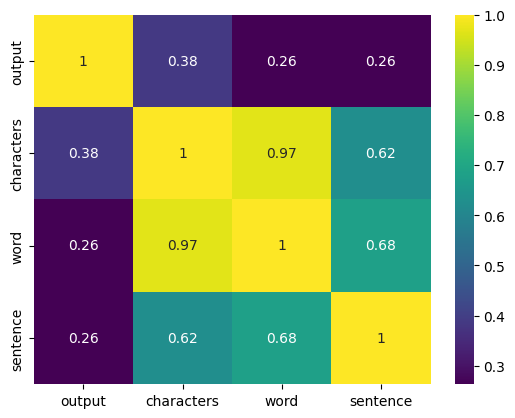

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap="viridis")

In [ ]:
# Intilizing Porter Stemmer Class
ps = PorterStemmer()

In [ ]:
# This Function helps to get Ready!!!

def data(text):
    text = text.lower()               #  Converts Text in Lower Case
    text = nltk.word_tokenize(text)   #  Breaks Text in Words

    y = []
    for i in text:
        if i.isalnum():               #  Removing Special Characters
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:                    #  Removing Stopwords and Punctuation
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:                    #  Porter Stemmer removing unwanted words
        y.append(ps.stem(i))

    return " ".join(y)

In [ ]:
df.sample(2)

,output,input,characters,word,sentence
1119,1,"Bored of speed dating? Try SPEEDCHAT, txt SPEE...",156,32,3
3977,0,Reason is if the team budget is available at l...,96,20,1


In [ ]:
# Transforming dataset using the "data" function in new column "new_data"
df["new_data"] = df["input"].apply(data)
df.sample(5)df.sample(5)

,output,input,characters,word,sentence,new_data
1849,0,You got job in wipro:)you will get every thing...,71,20,1,got job wipro get everi thing life 2 3 year
4388,0,"K I'm ready, &lt;#&gt; ?",25,13,1,k readi lt gt
3923,0,How? Izzit still raining?,25,6,2,izzit still rain
4272,0,Kind of. Just missed train cos of asthma attac...,106,26,3,kind miss train co asthma attack nxt one half ...
3736,0,Plz note: if anyone calling from a mobile Co. ...,263,75,4,plz note anyon call mobil amp ask u type lt gt...


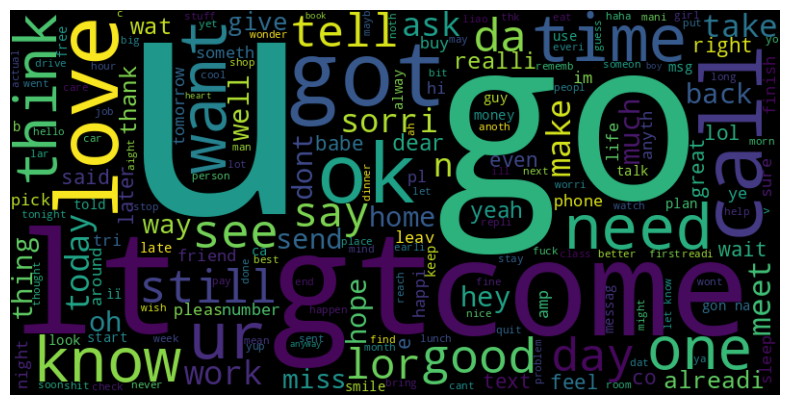

In [ ]:
wc = WordCloud(
    background_color=None,
    width=800,
    height=400
)
# Wordcloud for SPAM
spam_wc = wc.generate(df[df["output"] ==1]["new_data"].str.cat(sep=" "))

# Wordcloud for HAM
ham_wc = wc.generate(df[df["output"] ==0]["new_data"].str.cat(sep=" "))
# SPAM
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

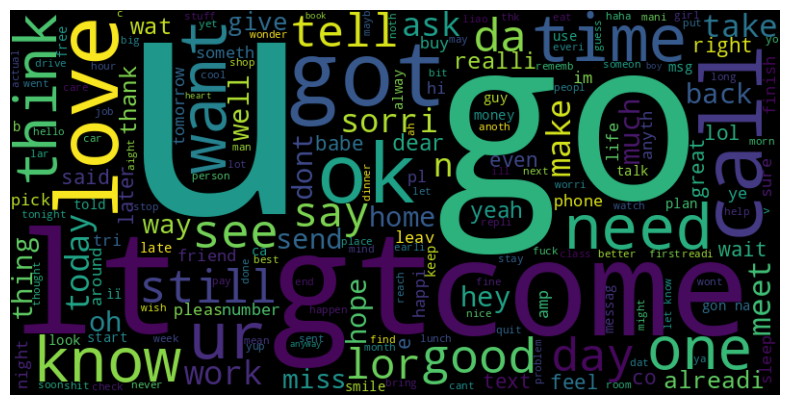

In [ ]:
# HAM
plt.figure(figsize=(10, 5))
plt.imshow(ham_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Spliting SPAM Sentences in Words
spam_corpus = []
for msg in df[df["output"]==1]["new_data"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

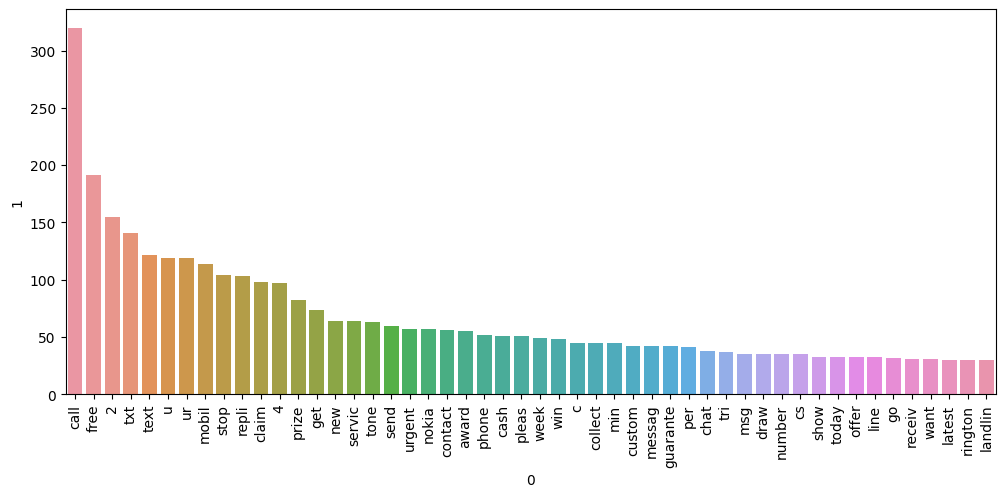

In [ ]:
# Top 50 SPAM Words
a=pd.DataFrame(Counter(spam_corpus).most_common(50))[0]
b=pd.DataFrame(Counter(spam_corpus).most_common(50))[1]
plt.figure(figsize=(12,5))
sns.barplot(x= a,y=b)
plt.xticks(rotation=90)

plt.show()

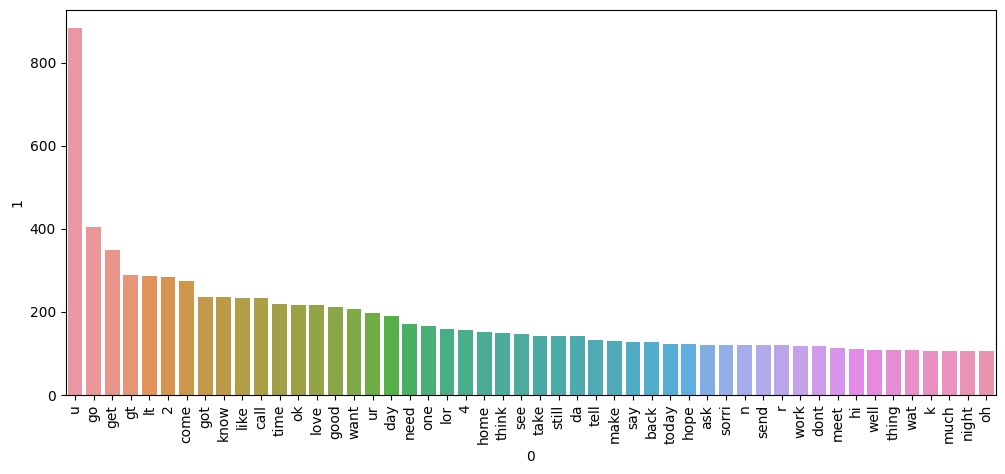

In [ ]:
# Spliting HAM Sentences in Words
ham_corpus = []
for msg in df[df['output'] == 0]['new_data'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
# Top 50 HAM Words
a=pd.DataFrame(Counter(ham_corpus).most_common(50))[0]
b=pd.DataFrame(Counter(ham_corpus).most_common(50))[1]
plt.figure(figsize=(12,5))
sns.barplot(x= a,y=b)
plt.xticks(rotation=90)

plt.show()

In [ ]:
# Initilizing TFIDF Vectorizer
tfidv = TfidfVectorizer(max_features=3000)
# Independent Feature
X = tfidv.fit_transform(df["new_data"]).toarray()
# Dependent Feature
y = df["output"].values
# Performing Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
# Models that are going to be trained
models={
    "Gaussian NB" : GaussianNB(),
    "Multinomial NB" : MultinomialNB(),
    "Bernoulli NB" : BernoulliNB(),
    "Logistic Regression" : LogisticRegression(),
    "SVC" : SVC(),
    "Decision Tree" : DecisionTreeClassifier(),
    "KNN" : KNeighborsClassifier(),
    "Bagging CLF" : BaggingClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "ETC" : ExtraTreesClassifier(),
    "Ada Boost" : AdaBoostClassifier(),
    "Gradient Boost" : GradientBoostingClassifier(),
    "XGB" : XGBClassifier(),
    "XGBRF" : XGBRFClassifier()
}

In [ ]:
# Creating a function train each model and calculate/return accuracy and precision
def train_clf (model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)

    return acc, pre

In [ ]:
# A FOR loop Calls "traim_clf" for each model and stores accuracy and precision
acc_s=[]
pre_s=[]

for name, model in models.items():
    accuracy, precision = train_clf(model, X_train, y_train, X_test, y_test)

    acc_s.append(accuracy)
    pre_s.append(precision)

In [ ]:
# As Precision matter over Accuracy in this Data, Sorting in DESC order of Precision. All Scores of Models

scores_df = pd.DataFrame({"Algorithm": models.keys(),
                          "Accuracy": acc_s,
                         "Precision": pre_s}).sort_values(by="Precision", ascending=False)

In [ ]:
scores_df

,Algorithm,Accuracy,Precision
1,Multinomial NB,0.970986,1.000000
6,KNN,0.905222,1.000000
2,Bernoulli NB,0.983559,0.991870
4,SVC,0.972921,0.982456
3,Logistic Regression,0.956480,0.979381
9,ETC,0.977756,0.975207
8,Random Forest,0.974855,0.974576
10,Ada Boost,0.960348,0.936937
12,XGB,0.971954,0.936000
11,Gradient Boost,0.955513,0.933962


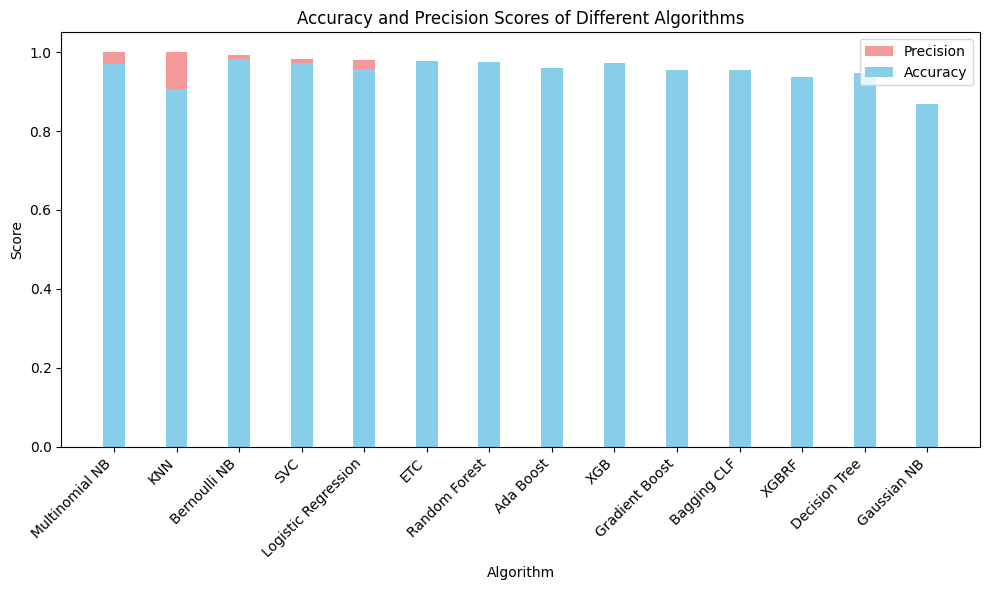

In [ ]:
# Graph Accuracy and Precision

plt.figure(figsize=(10, 6))
bar_width = 0.35

plt.bar(scores_df["Algorithm"], scores_df["Precision"], width=bar_width, label="Precision", color='lightcoral', alpha=0.8)
plt.bar(scores_df["Algorithm"], scores_df["Accuracy"], width=bar_width, label="Accuracy", color='skyblue')
plt.xlabel("Algorithm")
plt.ylabel("Score")
plt.title("Accuracy and Precision Scores of Different Algorithms")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Hence Multinomial Naïve Bayes give excellent precision and accuracy scores.
# According to me MNB is sutaible for Model

mnb=MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Pickle files help in Model Deployment

pickle.dump(mnb,open("model.pkl","wb"))
pickle.dump(tfidv, open("tfidf.pkl","wb"))
pickle.dump(data,open("fun.pkl","wb"))